[ 남북한 발전량 비교 ]
- 데이터 : 남북한발전전력량
- 기간 : 1990 ~ 2016년 

[1] 모듈 로딩 및 데이터 확인

In [107]:
# [1-1] 모듈 로딩 
import pandas as pd                         # 데이터 분석 및 전처리 모듈
import matplotlib.pyplot as plt             # 데이터 시각화 모듈
import font                                 # 사용자 정의 모듈
import numpy as np

In [108]:
# [1-2] 데이터 로딩 및 폰트 설정 

# 데이터 읽어오기
datas='../DATA/남북한발전전력량.xlsx'
ns=pd.read_excel(datas)

# 폰트 설정
font_path=r'C:/Users/knudc/AppData/Local/Microsoft/Windows/Fonts/강원교육모두 Bold.ttf'
font.set_font(font_path)

GangwonEduAll 폰트 설정


In [109]:
# [1-3] 데이터 확인
print(ns.head(2))

# 데이터 기본 정보 확인
ns.info()

  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  

[2 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null   

In [110]:
# [1-4] 확인 결과
# - 전력량 (억KWh) 컬럼 : 결측치는 이전 행 값으로 채우기
# - 1990년 ~ 2017년 컬럼 : '-'는 '0'으로 형변환, object -> int 형변환
# - 신재생 행 : 북한 데이터에 존재하지 않음 -> 비교를 하기 위해서 추가하기

[2] 데이터 전처리

In [111]:
# [2-1] 결측치 확인
# 확인 결과 7개의 결측치 발견
ns.isna().sum()

# 결측치를 이전 행 값으로 채우기
ns['전력량 (억㎾h)']=ns['전력량 (억㎾h)'].fillna(method='ffill')

# [2-2] 형변환
# '-'을 '0'으로 형변환
ns.replace('-',0,inplace=True)

# 변환 당시 int로 바로 변환하였기에 object -> int 형변환 불필요
ns.dtypes

# [2-3] 신재생 행 추가 

# 새로운 행 마지막에 추가
ns.loc[ns.shape[0]]=0

# 추가된 행의 원소값 변경
ns.loc[ns.index[-1],'전력량 (억㎾h)']='북한'
ns.loc[ns.index[-1],'발전 전력별']='신재생'
ns

C:\Users\knudc\AppData\Local\Temp\ipykernel_12908\1874427608.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ns['전력량 (억㎾h)']=ns['전력량 (억㎾h)'].fillna(method='ffill')
C:\Users\knudc\AppData\Local\Temp\ipykernel_12908\1874427608.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ns.replace('-',0,inplace=True)


전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1        남한     수력    64    51    49    60    41    55    52    54  ...    50   
2        남한     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3        남한    원자력   529   563   565   581   587   670   739   771  ...  1429   
4        남한    신재생     0     0     0     0     0     0     0     0  ...     0   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6        북한     수력   156   150   142   133   138   142   125   107  ...   133   
7        북한     화력   121   113   105    88    93    88    88    86  ...   103   
8        북한    원자력     0     0     0     0     0     0     0     0  ...     0   
9        북한    신재생     0     0     0     0     0     0     0     0  ...     0   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  3196  3343  3430  3581  3427  3402  3523  
3  1510  1478  1486  1547  1503  1388  1564  1648  1620  
4     0     0     0     0    86   118   151   173   195  
5   255   235   237   211   215   221   216   190   239  
6   141   125   134   132   135   139   130   100   128  
7   114   110   103    79    80    82    86    90   111  
8     0     0     0     0     0     0     0     0     0  
9     0     0     0     0     0     0     0     0     0  

[10 rows x 29 columns]

[3] 데이터 비교 분석

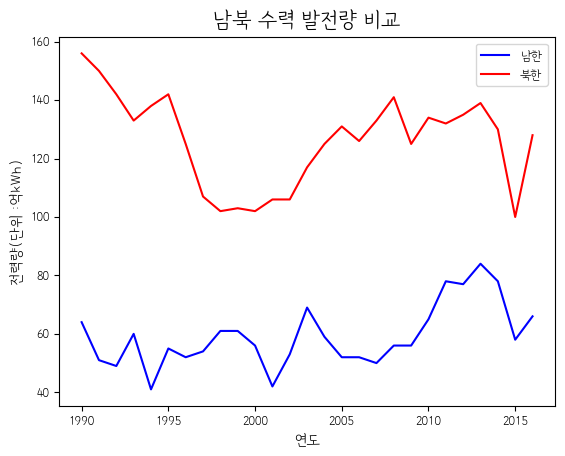

In [112]:
# 멀티 인덱스 지정
ns=ns.set_index(['전력량 (억㎾h)','발전 전력별'])

# [3-1] 수력 비교 분석 (표 그래프)
ns=ns.T
xdatas=ns.index
ydatas=ns[('남한','수력')]
xdatan=ns.index
ydatan=ns[('북한','수력')]
plt.plot(xdatas,ydatas,'b',label='남한')
plt.plot(xdatan,ydatan,'r',label='북한')
plt.legend()
plt.title('남북 수력 발전량 비교', fontdict={'size':'xx-large'})
plt.xlabel('연도',fontdict={'size':'large'})
plt.ylabel('전력량(단위 :억kWh)',fontdict={'size':'large'})

plt.show()


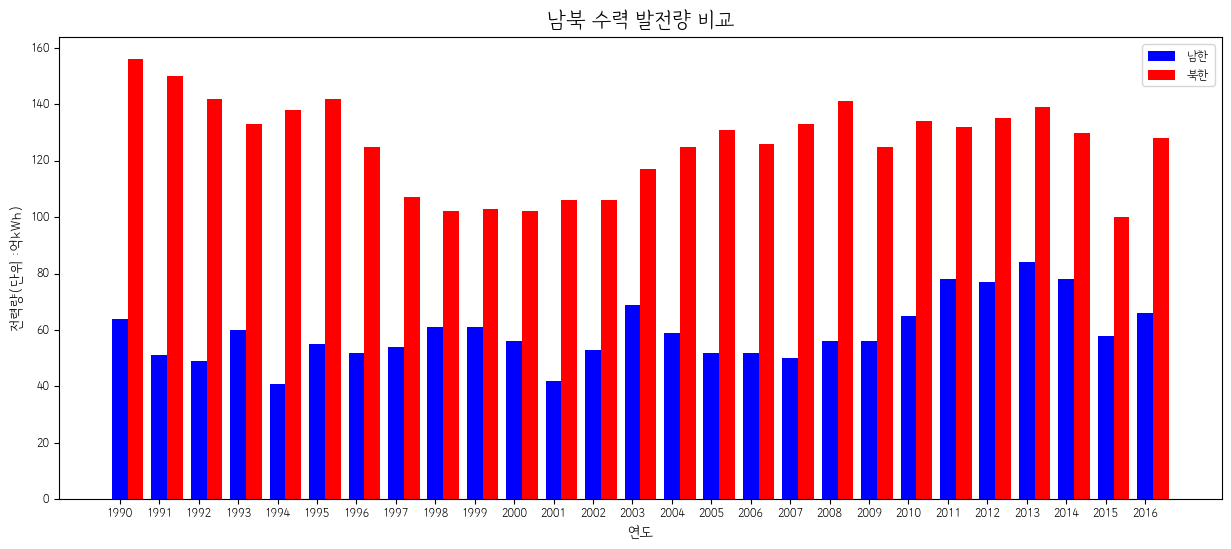

In [113]:
# [3-2] 수력 비교 분석 (막대 그래프)
plt.figure(figsize=(15,6))

xdatas=ns.index.astype(int) 
ydatas=ns[('남한','수력')].astype(int)
ydatan=ns[('북한','수력')].astype(int)
w=0.4
plt.bar(xdatas,ydatas,color='blue',label='남한',width=w)
plt.bar(xdatas+0.4,ydatan,color='red',label='북한',width=w)
plt.legend()


plt.title('남북 수력 발전량 비교', fontdict={'size':'xx-large'})
plt.xlabel('연도',fontdict={'size':'large'})
plt.ylabel('전력량(단위 :억kWh)',fontdict={'size':'large'})
plt.xticks(list(xdatas))
plt.show()


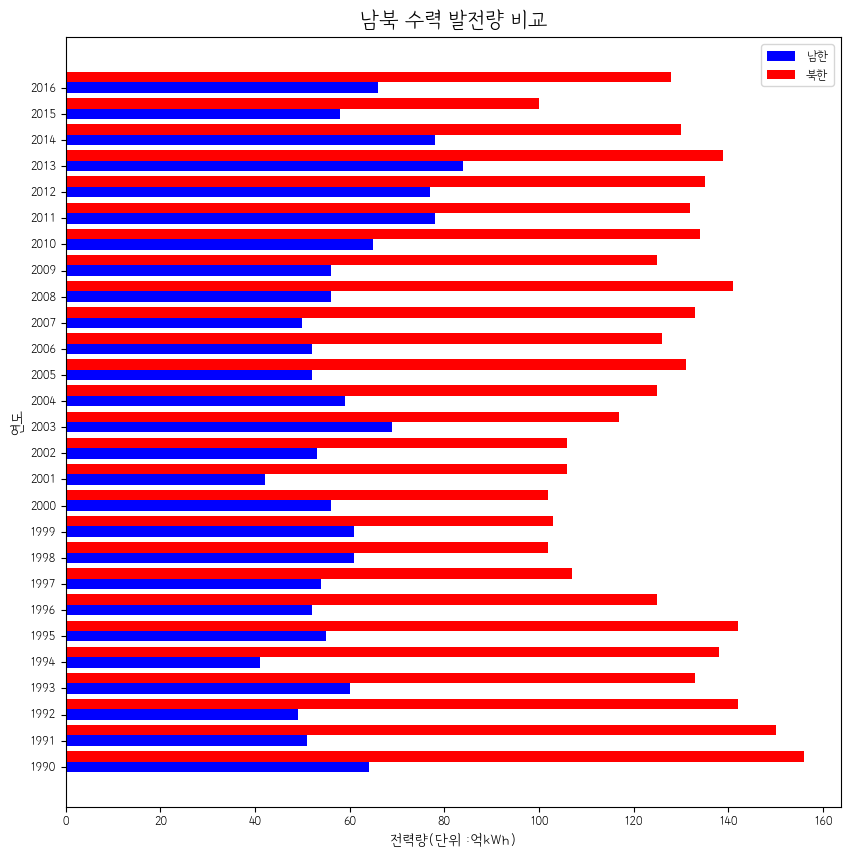

In [114]:
# [3-3] 수력 비교 분석 (가로 막대 그래프)

plt.figure(figsize=(10,10))

ydatas=ns.index.astype(int) 
xdatas=ns[('남한','수력')].astype(int)
xdatan=ns[('북한','수력')].astype(int)
w=0.4
plt.barh(ydatas,xdatas,color='blue',label='남한',height=0.4)
plt.barh(ydatas+0.4,xdatan,color='red',label='북한',height=0.4)
plt.legend()


plt.title('남북 수력 발전량 비교', fontdict={'size':'xx-large'})
plt.xlabel('전력량(단위 :억kWh)',fontdict={'size':'large'})
plt.ylabel('연도',fontdict={'size':'large'})

plt.yticks(list(ydatas))
plt.show()